In [1]:
# Install latest version from GitHub
!pip install -q -U git+https://github.com/jdvelasq/techminer

# Ocurrence

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

from techminer import DataFrame, Plot

#
# Data loading
#
df = DataFrame(
    pd.read_json(
        "https://raw.githubusercontent.com/jdvelasq/techminer/master/data/tutorial/"
        + "cleaned-data.json",
        orient="records",
        lines=True,
    )
)

## Authors

In [5]:
top_authors = DataFrame(df[df.top_10_Authors_freq])
top_authors.occurrence(column="Authors", as_matrix=True)

,Al-Askar H.,Al-Jumeily D.,Arevalo A.,Gabbouj M.,Ghazali R.,Hernandez G.,Hussain A.J.,Iosifidis A.,Kanniainen J.,Leon D.,Liatsis P.,Nino J.,Passalis N.,Radi N.,Sandoval J.,Tefas A.,Tsantekidis A.
Al-Askar H.,2,2,0,0,0,0,2,0,0,0,0,0,0,1,0,0,0
Al-Jumeily D.,2,2,0,0,0,0,2,0,0,0,0,0,0,1,0,0,0
Arevalo A.,0,0,3,0,0,3,0,0,0,3,0,3,0,0,3,0,0
Gabbouj M.,0,0,0,3,0,0,0,3,3,0,0,0,3,0,0,3,2
Ghazali R.,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0
Hernandez G.,0,0,3,0,0,3,0,0,0,3,0,3,0,0,3,0,0
Hussain A.J.,2,2,0,0,1,0,3,0,0,0,1,0,0,1,0,0,0
Iosifidis A.,0,0,0,3,0,0,0,3,3,0,0,0,3,0,0,3,2
Kanniainen J.,0,0,0,3,0,0,0,3,3,0,0,0,3,0,0,3,2
Leon D.,0,0,3,0,0,3,0,0,0,3,0,3,0,0,3,0,0


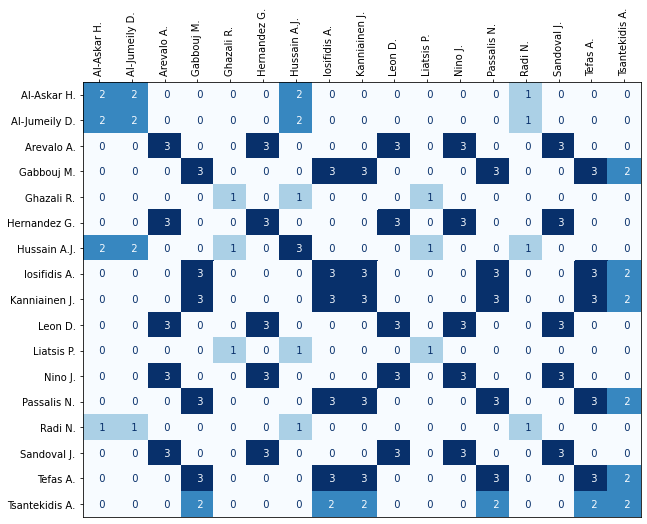

In [9]:
plt.figure(figsize=(10, 8))
Plot(top_authors.occurrence(column="Authors", as_matrix=True)).heatmap(cmap='Blues')

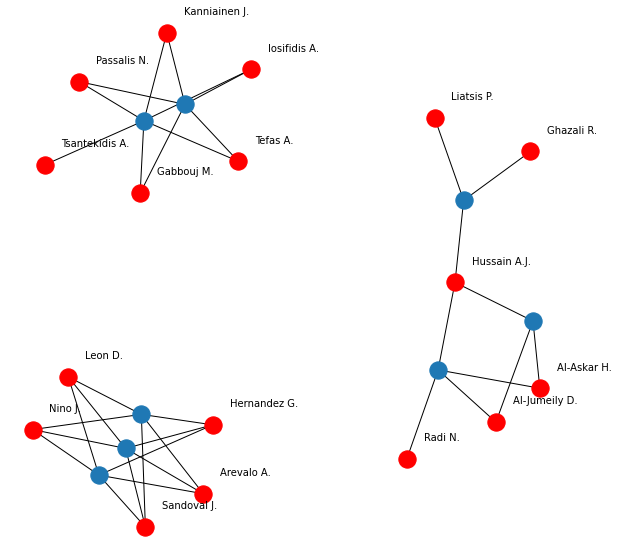

In [18]:
from techminer.maps import Map

plt.figure(figsize=(10, 10))
dic1 = top_authors.occurrence_map(column="Authors")
dic2 = dict(
    term_props={"node_color": "red"},
    label_docs_props={"font_color": "lightblue"},
    label_term_props=dict(ma="left", rotation=0, fontsize=10, disp=3, bbox=None),
)
kwargs = {**dic1, **dic2}
Map().ocurrence_map(**kwargs)

## Keywords

In [6]:
#
# Analysis for top 10 most frequent keywords
#
top_keywords = df.documents_by_term('keywords', sep=';').head(10).keywords
top_keywords

0                  Forecasting
1            Financial markets
2                Deep learning
3                  Time series
4                     Commerce
5           Electronic trading
6       Long short-term memory
7    Recurrent neural networks
8              Neural networks
9        Financial time series
Name: keywords, dtype: object

In [33]:
matrix = df.occurrence(column="keywords", sep=';')
matrix.head()

,keywords (IDX),keywords (COL),Num Documents,ID
0,Deep learning,Deep learning,153,"[3, 3, 3, 3, 4, 7, 7, 7, 7, 13, 15, 19, 19, 19..."
1,Forecasting,Forecasting,114,"[3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, ..."
2,Deep learning,Forecasting,80,"[3, 3, 4, 7, 7, 13, 15, 22, 25, 25, 25, 25, 26..."
3,Forecasting,Deep learning,80,"[3, 3, 4, 7, 7, 13, 15, 22, 25, 25, 25, 25, 26..."
4,Time series,Time series,80,"[6, 8, 9, 12, 14, 15, 17, 24, 29, 30, 31, 33, ..."


In [47]:
matrix = df.occurrence(column="keywords", sep=';', as_matrix=True)
matrix = matrix[[col for col in matrix.columns if col in top_keywords.tolist()]]
matrix = matrix.loc[[col for col in matrix.columns if col in top_keywords.tolist()],:]
matrix

,Commerce,Deep learning,Electronic trading,Financial markets,Financial time series,Forecasting,Long short-term memory,Neural networks,Recurrent neural networks,Time series
Commerce,64,55,41,48,19,49,23,23,21,32
Deep learning,55,153,43,56,32,80,29,30,16,49
Electronic trading,41,43,61,49,22,49,28,26,24,27
Financial markets,48,56,49,69,22,61,35,24,26,31
Financial time series,19,32,22,22,53,35,16,13,20,25
Forecasting,49,80,49,61,35,114,42,29,40,58
Long short-term memory,23,29,28,35,16,42,53,4,11,23
Neural networks,23,30,26,24,13,29,4,45,10,18
Recurrent neural networks,21,16,24,26,20,40,11,10,58,25
Time series,32,49,27,31,25,58,23,18,25,80


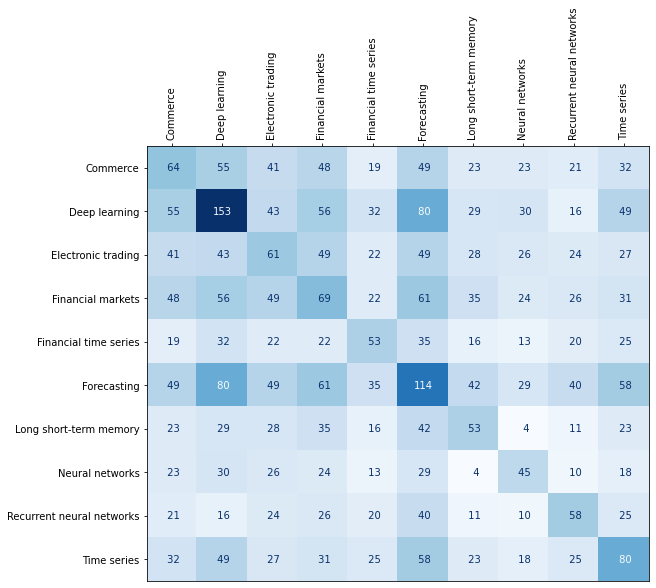

In [49]:
plt.figure(figsize=(9, 8))
Plot(matrix).heatmap(cmap='Blues')